In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../src/scenes/')
import syndiff as sd 

from astropy.visualization import (SqrtStretch, ImageNormalize)
from copy import deepcopy
from scipy.ndimage import rotate
import matplotlib.patches as patches
from matplotlib.path import Path

from scipy.optimize import minimize
from astropy.stats import sigma_clipped_stats
from astropy.io import fits
from astropy.wcs import WCS

In [20]:
from astroquery.imcce import Skybot
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
ra =125.72257351574488
dec = 48.97738400366453
field = SkyCoord(ra*u.deg, dec*u.deg) 
epoch = Time(59943.59632536958, format='mjd')
results = Skybot.cone_search(field, 1.5*u.arcmin, epoch,location='C57')
results.pprint(max_width=80)  

Number    Name           RA         ...      vy           vz       epoch  
                        deg         ...    AU / d       AU / d       d    
------ --------- ------------------ ... ------------ ----------- ---------
226554 2003 WR21 125.73935208333333 ... -0.006621481 -0.00019964 2459940.0


In [29]:
import numpy as np

In [30]:
-2.5*np.log10(117.02364129846863) + 20.44

15.269315981354818

Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,geodist,heliodist,alpha,elong,x,y,z,vx,vy,vz,epoch
,,deg,deg,,mag,arcsec,arcsec,arcsec / h,arcsec / h,AU,AU,deg,deg,AU,AU,AU,AU / d,AU / d,AU / d,d
int64,str9,float64,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
226554,2003 WR21,125.73935208333333,48.99304722222222,NEA>Apollo,15.9,0.012,68.927,112.5037,412.72,0.08881729387,1.06253105754,30.61,146.75,-0.116489432,0.970947637,0.455559578,-0.015496231,-0.006621481,-0.00019964,2459940.0


In [23]:
(results['RA'].value - ra)*60**2

array([60.40284332])

In [25]:
(results['DEC'].value - dec)*60**2

array([56.38758681])

In [2]:
from glob import glob

In [3]:
sky_cells = glob('data/ps1_skycell/*.fits')

In [7]:
ps1 = fits.open(sky_cells[0])

In [11]:
tess = fits.open('data/tess2019360165923-s0020-1-1-0165-s_ffic.fits')

<IPython.core.display.Javascript object>


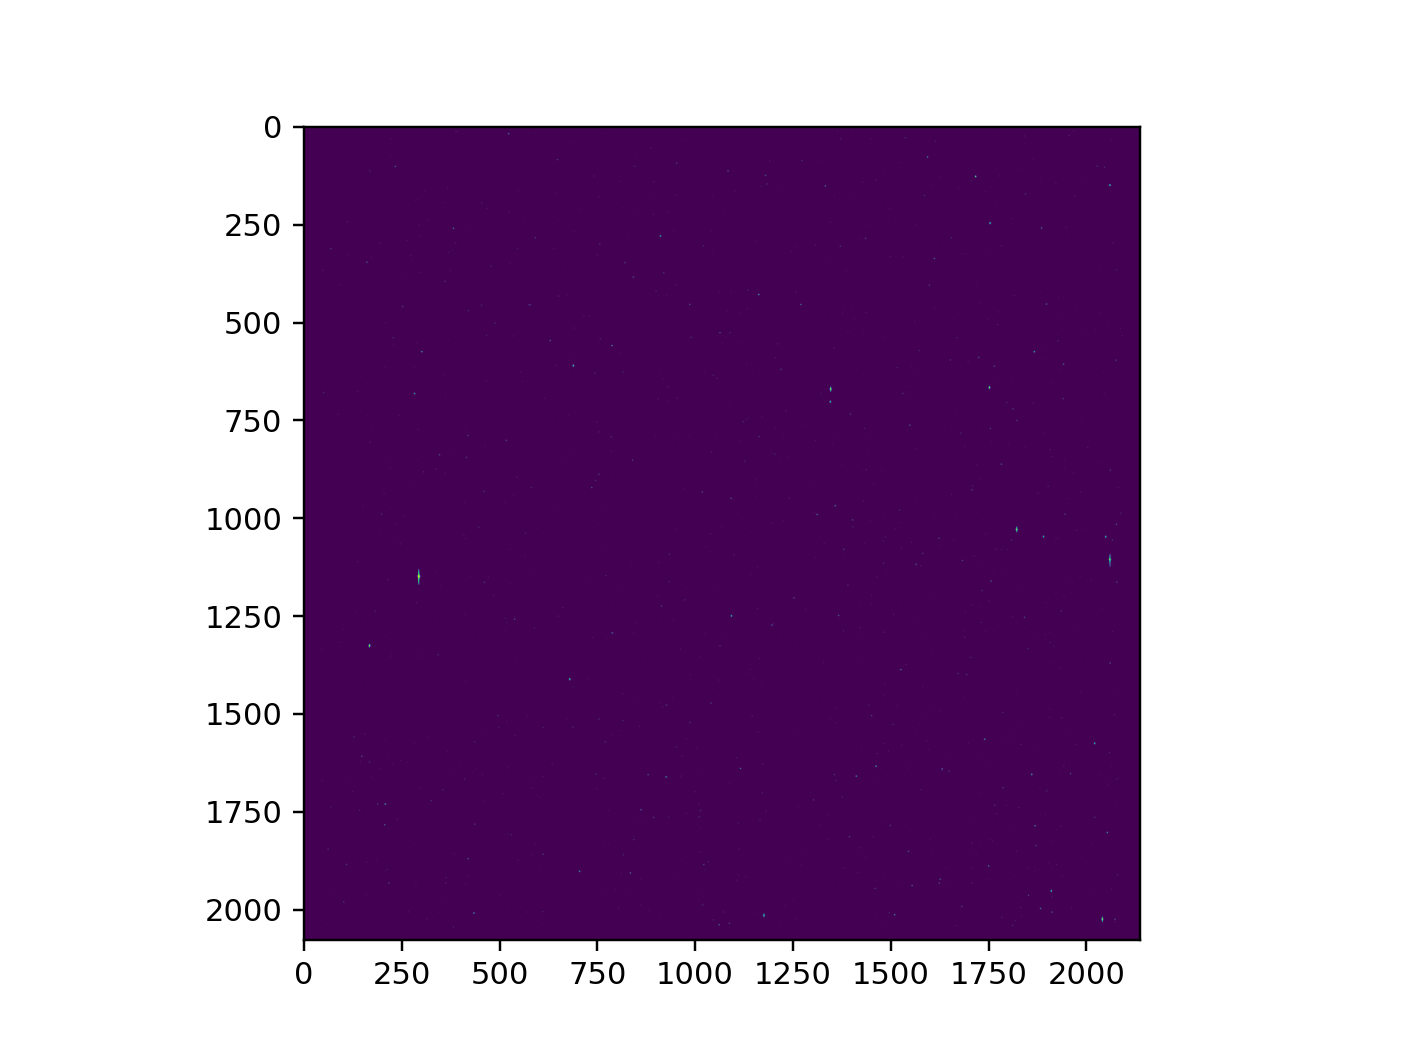

In [12]:
plt.figure()
plt.imshow(tess[1].data)

In [17]:
wcsps1 = WCS(ps1[0].header)

In [19]:
wcsps1.calc_footprint()

array([[121.4622083 ,  45.55702946],
       [121.44416694,  45.99333658],
       [120.81489725,  45.97894485],
       [120.83784696,  45.54285605]])

<IPython.core.display.Javascript object>


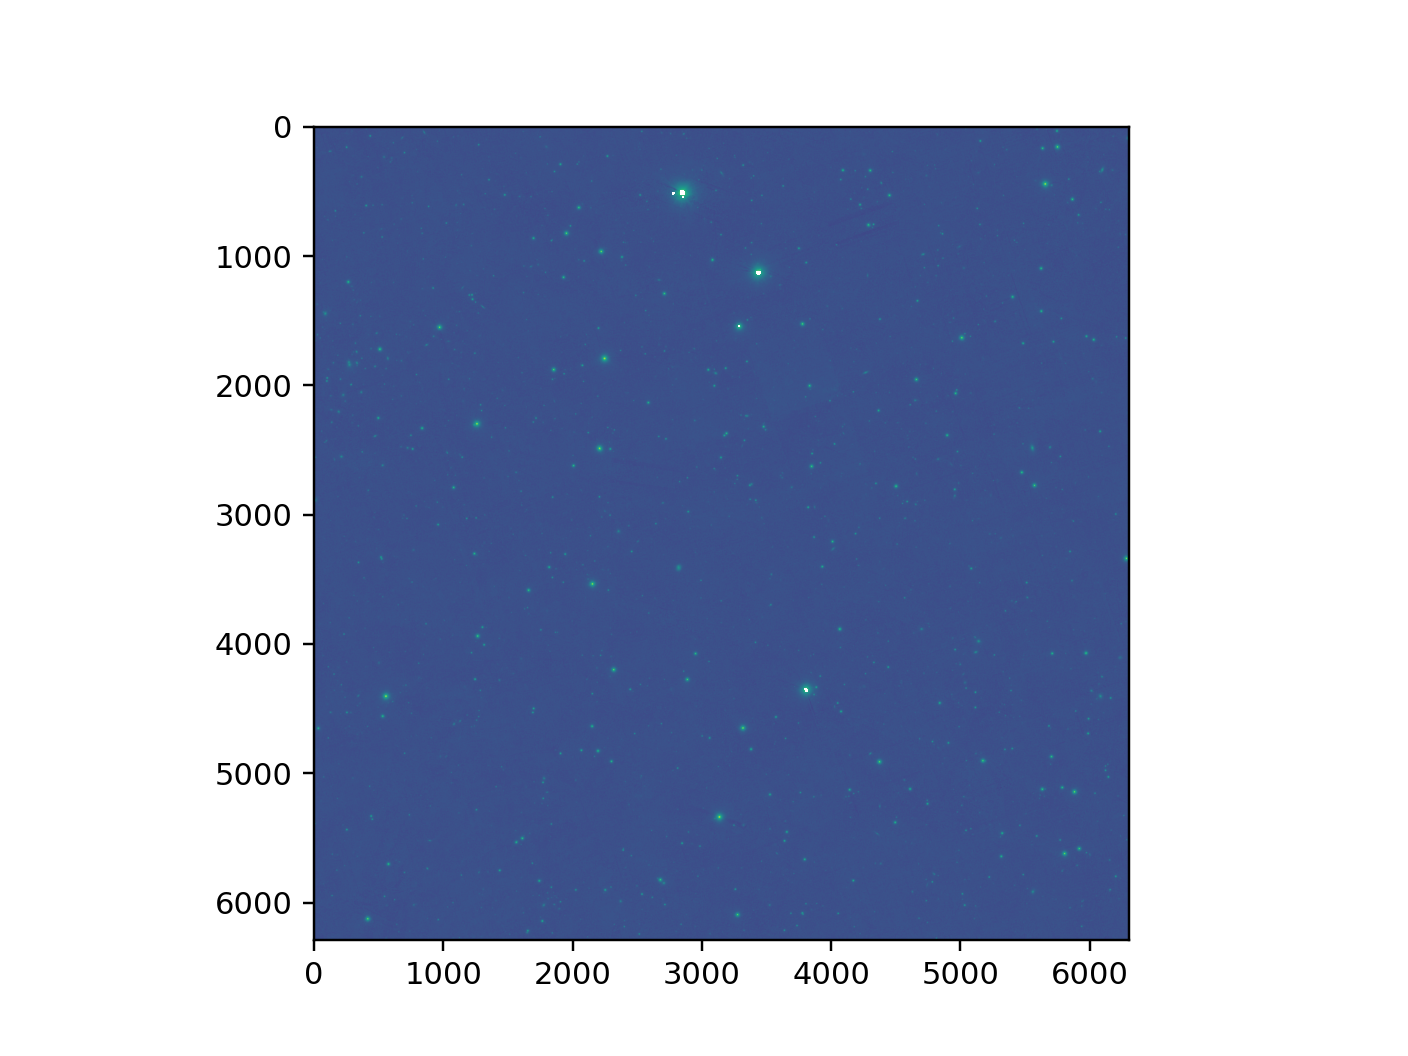

In [10]:
plt.figure()
plt.imshow(ps1[0].data)